In [2]:
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.util.shape import view_as_windows

In [3]:
from IPython.display import JSON

# Create logo mask

In [4]:
BLOCK_H = 8
BLOCK_W = 8
LOGO_NUM_BLOCK_H = 4
LOGO_NUM_BLOCK_W = 19

### Empty 2d array spanning the logo

In [5]:
def emptyLogo():
    return np.zeros([BLOCK_H * LOGO_NUM_BLOCK_H, 
                    BLOCK_W * LOGO_NUM_BLOCK_W,
                    4], dtype=np.float32)

### Mask having pixel value of 1 where the logo is, and 0 for pixels outside the logo

In [6]:
def logoMask():
    logo_mask = emptyLogo()+1

    bh = BLOCK_H
    bw = BLOCK_W
    
    # Block row 1

    logo_mask[bh*0:bh*1, bw* 2:bw*13] = 0
    logo_mask[bh*0:bh*1, bw*14:bw*19] = 0

    # Block row 2
    logo_mask[bh*1:bh*2, bw* 0:bw* 1] = 0
    logo_mask[bh*1:bh*2, bw* 3:bw* 4] = 0
    logo_mask[bh*1:bh*2, bw*10:bw*11] = 0
    logo_mask[bh*1:bh*2, bw*15:bw*16] = 0

    # Block row 3
    logo_mask[bh*2:bh*3, bw* 2:bw* 4] = 0
    logo_mask[bh*2:bh*3, bw* 5:bw* 6] = 0
    logo_mask[bh*2:bh*3, bw* 8:bw*10] = 0
    logo_mask[bh*2:bh*3, bw*11:bw*12] = 0
    logo_mask[bh*2:bh*3, bw*14:bw*16] = 0
    logo_mask[bh*2:bh*3, bw*17:bw*18] = 0

    # Block row 4
    logo_mask[bh*3:bh*4, bw* 6:bw* 7] = 0
    logo_mask[bh*3:bh*4, bw* 8:bw*10] = 0
    logo_mask[bh*3:bh*4, bw*18:bw*19] = 0
    
    return logo_mask

In [7]:
logoMask().shape

(32, 152, 4)

### Helper function for plotting

In [38]:
def showLogo(logo, scale=1):
    fig, ax = plt.subplots(
        figsize = (LOGO_NUM_BLOCK_W*scale,LOGO_NUM_BLOCK_H*scale),
        facecolor='white'
    )

    plt.style.use('dark_background')
    ax.set_facecolor('lightgrey')


    ax = plt.gca()
    
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fig.tight_layout()

    plt.imshow(logo)


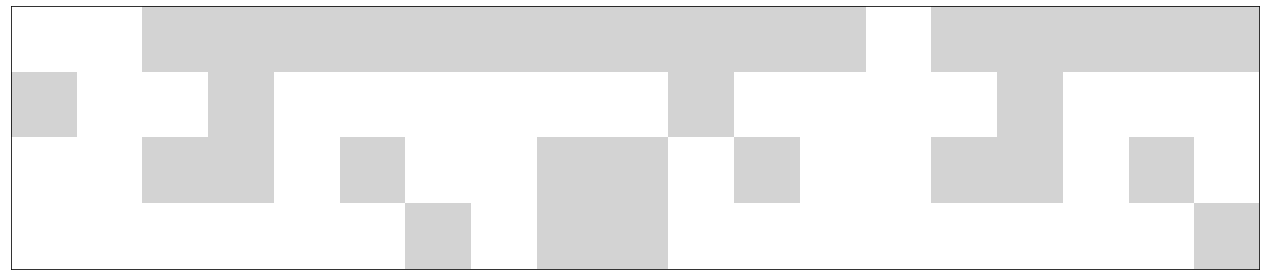

In [9]:
showLogo(logoMask())

### Create 2d array of random colors

In [24]:
logo2d_rand = np.random.uniform(0,1, size=[BLOCK_H*LOGO_NUM_BLOCK_H, BLOCK_W*LOGO_NUM_BLOCK_W, 4])

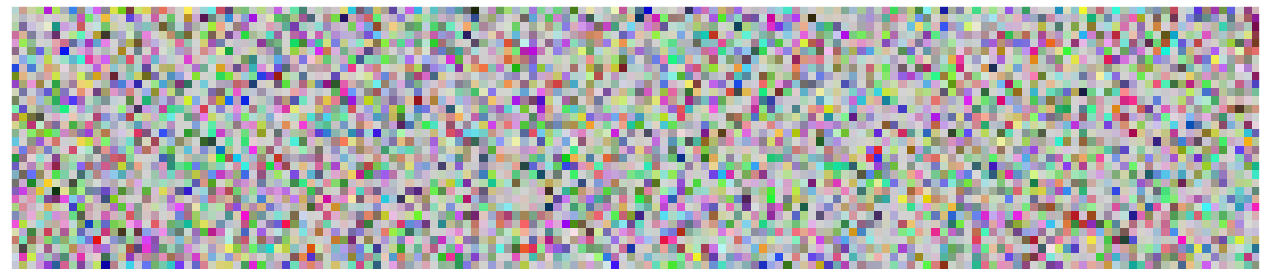

In [25]:
showLogo(logo2d_rand)

In [12]:
logo2d_rand.shape

(32, 152, 4)

### Multiply it with the logo mask to extract pixels that overlap with the logo mask

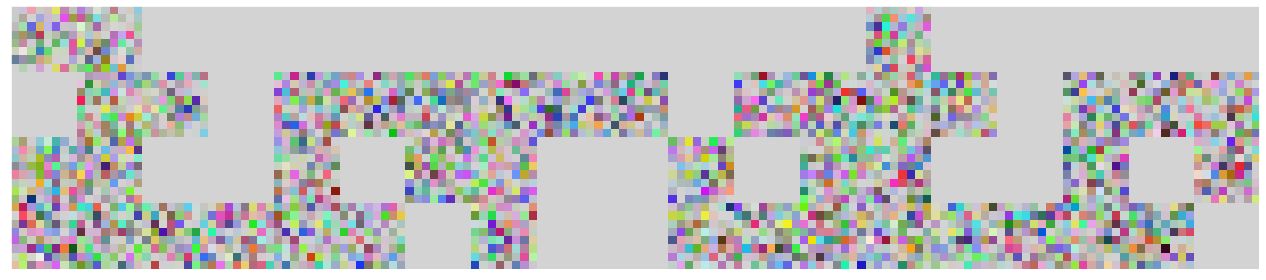

In [13]:
showLogo(logo2d_rand*logoMask())

### Helper function to slice array based on block indices

In [14]:
def getPixelSlice(row_block_start,col_block_start, num_blocks_w, num_blocks_h):

    pixel_row_start = row_block_start * BLOCK_W
    pixel_col_start = col_block_start * BLOCK_H
    
    num_pixel_width = num_blocks_w * BLOCK_W
    num_pixel_height = num_blocks_h * BLOCK_H
    
    pixel_row_end = pixel_row_start + num_pixel_width
    pixel_col_end = pixel_col_start + num_pixel_height
    
    pixel_slice = np.s_[pixel_row_start:pixel_row_end,
                        pixel_col_start:pixel_col_end]
    return pixel_slice

## Extract letters

In [15]:
def getLetterMask(letter_number):
    letter_mask = emptyLogo()
    logo_mask = logoMask()

    letter_num_block_w=letter_block_start=0
    
    # Define letter width and start (unit in blocks)
    if letter_number == 0:
        letter_num_block_w = 1
        letter_block_start = 0
    elif letter_number == 1:
        letter_num_block_w = 3
        letter_block_start = 1
    elif letter_number == 2:
        letter_num_block_w = 3
        letter_block_start = 4
    elif letter_number == 3:
        letter_num_block_w = 3
        letter_block_start = 7
    elif letter_number == 4:
        letter_num_block_w = 3
        letter_block_start = 10
    elif letter_number == 5:
        letter_num_block_w = 3
        letter_block_start = 13
    elif letter_number == 6:
        letter_num_block_w = 3
        letter_block_start = 16

    letter_slice = getPixelSlice(0, letter_block_start, LOGO_NUM_BLOCK_H, letter_num_block_w)
    
    letter_mask[letter_slice] = 1
    
    return letter_mask * logo_mask

In [16]:
letter_i = getLetterMask(0)

### Get the third letter mask

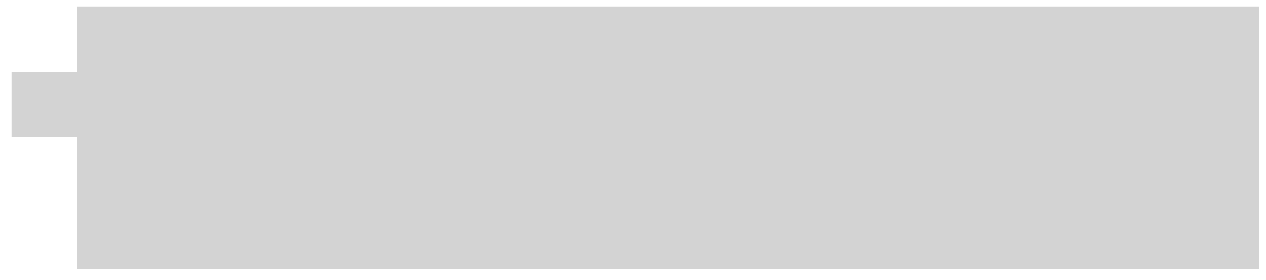

In [17]:
showLogo(getLetterMask(0))

### Assign random color to each letter by multiplication

In [18]:
def getRandomRGBAColor():
    return np.append(np.random.choice(range(256), size=3)/ 256, 1)

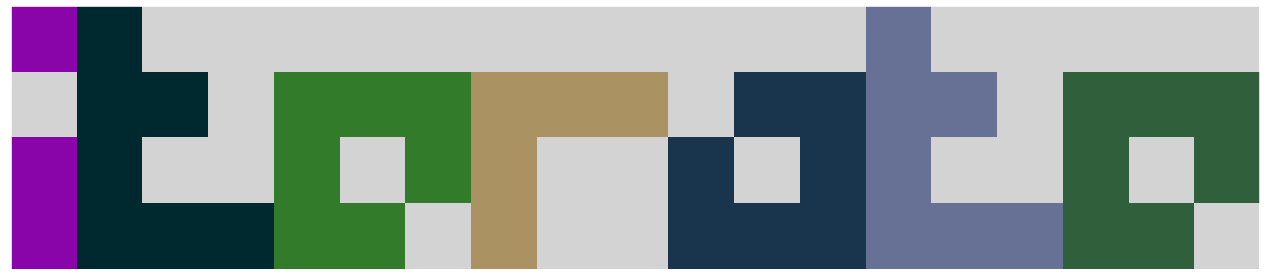

In [34]:
cumulative_logo = emptyLogo()
letter_range = range(7)

for letter_mask in map(getLetterMask, range(7)):
    
    random_color = getRandomRGBAColor()

    colored_letter = letter_mask * random_color
    
    cumulative_logo = cumulative_logo + colored_letter
showLogo(cumulative_logo)

## Extract blocks from letter

In [28]:
def getLetterBlockMask(letter_mask):
    s=BLOCK_W
    window_shape = (BLOCK_W,BLOCK_H, 4)
    block_masks = []
    windows = view_as_windows(letter_mask, window_shape, step=s)
    for r_block_idx, row in enumerate(windows):
        for c_block_idx, col in enumerate(row):
            if col.all():
                block_mask = emptyLogo()
                
                block_slice = getPixelSlice(r_block_idx, c_block_idx, 1, 1)
                
                block_mask[block_slice] = 1
                block_masks.append(block_mask)
            
    return block_masks

### Plot each block of letter 'I'

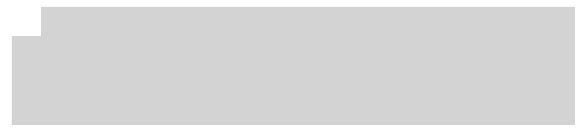

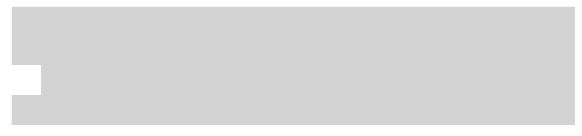

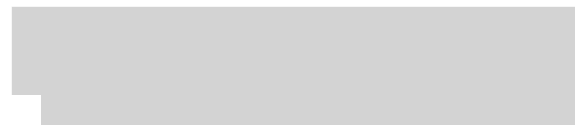

In [40]:
letter_blocks = getLetterBlockMask(getLetterMask(0))
for block_mask in letter_blocks:
    showLogo(block_mask, scale=0.5)

## Apply color to each block in letter

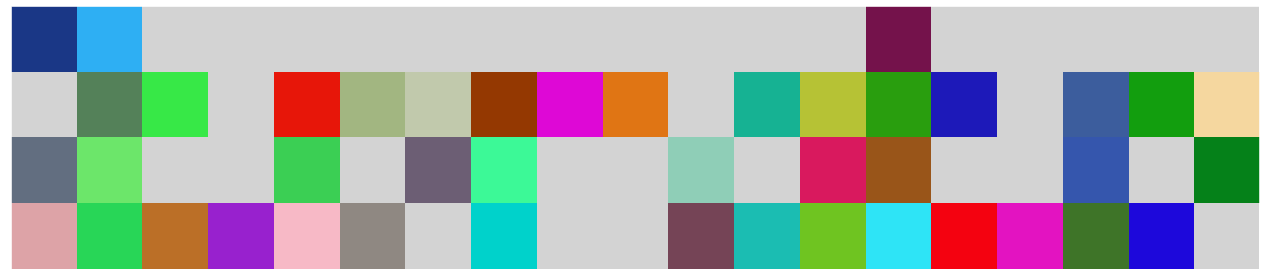

In [37]:
cumulative_logo = emptyLogo()
letter_range = range(7)

for letter_mask in map(getLetterMask, range(7)):
    for letter_block_mask in getLetterBlockMask(letter_mask):

        random_color = getRandomRGBAColor()

        colored_block = letter_block_mask * random_color

        cumulative_logo = cumulative_logo + colored_block
showLogo(cumulative_logo)